<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/The_Irish_Times_logo.svg/375px-The_Irish_Times_logo.svg.png' />

# Problem Statement

The goal of this project is to build classifier models that can predict the category of news. The project also focuses on evaluating different models based on their accuracy and other metrics. I will be working on a labeled dataset that contains data from The Irish Times with 156 different news categories. In this project I will focus on classifying 5 main news categories. The project is run on an **AWS EC2** instance.

# Dataset

The dataset for this project can be found on <a href='https://www.kaggle.com/therohk/ireland-historical-news'>Kaggle</a>. It contains **1.43** million records with data ranging from the year 1996 to 2018.

# EDA
Dataset is cleaned and exploratory data analysis of the dataset is performed to summarize the data and find key insights in the form of interactive plotly visualizations.

# Machine Learning

Data preprocessing techniques such as normalization, lemmatization, stemming etc. are implemented to ensure right data is fed to the machine learning mdoels. Models are then evaluated based on various metrics and the best model is chosen.

<b>*This notebook contains interactive plotly visualizations which are not rendered on GitHub. Please use the following link to view this notebook with rendered interactive visualizations - 
    
Hover over any visualization below to get more info about them.

<b>Author: Abhishek Annappa Prabhu<br>
Email: aannappa@buffalo.edu</b>

### Importing libraries

In [1]:
#Libraries to perform data analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#To filter warnings.
import warnings
warnings.filterwarnings('ignore')

#Libraries for interactive plotly visualizations.
import plotly.offline as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from plotly import tools
import plotly.graph_objs as go
init_notebook_mode(connected=True)

#Library to generate wordcloud.
from wordcloud import WordCloud

C:\Users\Abhishek\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\Abhishek\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [2]:
df = pd.read_csv('F:/DS/NewsClassification/irishtimes-date-text.csv')

In [3]:
df.head()

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life


In [4]:
df.shape

(1425460, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425460 entries, 0 to 1425459
Data columns (total 3 columns):
publish_date         1425460 non-null int64
headline_category    1425460 non-null object
headline_text        1425460 non-null object
dtypes: int64(1), object(2)
memory usage: 32.6+ MB


In [6]:
print('Number of headline categories:', df['headline_category'].nunique())

Number of headline categories: 156


In [7]:
#Splitting date into YYYY-MM-DD format.
def convert_date(date):
    mod_date = ''
    date = str(date)
    mod_date = date[0:4] + '-' + date[4:6] + '-' + date[6:]
    return mod_date

In [8]:
df['publish_date'] = df['publish_date'].apply(convert_date)
df.head()

,publish_date,headline_category,headline_text
0,1996-01-02,news,UUP sees possibility of voting Major out
1,1996-01-02,news,Pubs targeted as curbs on smoking are extended
2,1996-01-02,news,Papers reveal secret links with O'Neill cabinet
3,1996-01-02,news,Domestic chaos as Italy takes EU presidency
4,1996-01-02,news,Learning about the star to which we owe life


In [9]:
#Creating separate columns for year, month and day. Easier to visualize data.
df['year'] = df['publish_date'].apply(lambda x: int(x[0:4]))
df['month'] = df['publish_date'].apply(lambda x: int(x[5:7]))
df['day'] = df['publish_date'].apply(lambda x: int(x[8:]))

df.head()

,publish_date,headline_category,headline_text,year,month,day
0,1996-01-02,news,UUP sees possibility of voting Major out,1996,1,2
1,1996-01-02,news,Pubs targeted as curbs on smoking are extended,1996,1,2
2,1996-01-02,news,Papers reveal secret links with O'Neill cabinet,1996,1,2
3,1996-01-02,news,Domestic chaos as Italy takes EU presidency,1996,1,2
4,1996-01-02,news,Learning about the star to which we owe life,1996,1,2


## EDA

### Number of articles published per year.

In [10]:
x = df.groupby('year')['month'].count().index.values
y = df.groupby('year')['month'].count().values

trace1 = go.Bar(x=x,
                y=y,
                opacity=0.9
               )

layout = go.Layout(title='<b>Number of articles published by Year</b>',
                   xaxis=dict(title='Year',
                              tickangle=90,
                              type='category'
                             ),
                   yaxis=dict(title='Number of articles')
                  )

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

Hover over the viz to get exact values for each year.

### Average number of articles published per month

In [11]:
num_articles = []
y = []
for i, month in enumerate(df['month'].unique()):
    for year in df['year'].unique():
        num_articles.append(df[df['year'] == year].groupby('month')['month'].count().values[i])
    y.append(sum(num_articles)/len(num_articles))
    num_articles = []

x = df.groupby('month')['year'].count().index.values

trace2 = go.Bar(x=x,
                y=y, 
                marker_color='orange',
                opacity=0.9
               )

layout = go.Layout(title='<b>Average Number of articles published per Month</b>',
                   xaxis=dict(title='Month',
                              type='category'
                             ),
                   yaxis=dict(title='Number of articles')
                  )

fig = go.Figure(data=[trace2], layout=layout)
py.iplot(fig)

Hover over the viz to get exact values for each month.

### Average number of articles published by day

In [12]:
num_articles = []
y = []
for i, month in enumerate(df['day'].unique()):
    for year in df['year'].unique():
        num_articles.append(df[df['year'] == year].groupby('day')['day'].count().values[i])
    y.append(sum(num_articles)/len(num_articles))
    num_articles = []

x = df.groupby('day')['day'].count().index.values
y = df.groupby('day')['day'].count().values / 23 / 12
trace3 = go.Bar(x=x,
                y=y,
                marker_color='skyblue'
               )

layout = go.Layout(title='<b>Average Number of articles published by Day</b>',
                   xaxis=dict(title='Day',
                              type='category'
                             ),
                   yaxis=dict(title='Number of articles')
                  )

fig = go.Figure(data=[trace3], layout=layout)
py.iplot(fig)

Hover over the viz to get exact values for each day.

### Number of articles published date wise

In [13]:
x = df.groupby('publish_date')['year'].count().index.values
y = df.groupby('publish_date')['year'].count().values

trace4 = go.Scatter(x=x,
                    y=y,
                    marker_color='lightseagreen'
                   )

layout = go.Layout(title='<b>Number of articles published date wise</b>',
                xaxis=dict(title='Date', type='category',
                           automargin=True
                          ),
                yaxis=dict(title='Number of articles')
               )

fig = go.Figure(data=[trace4], layout=layout)
py.iplot(fig)

### Top 10 Headline Categories by Count

In [14]:
y = reversed(df['headline_category'].value_counts().head(10).sort_values(ascending=False).index.values.tolist())
x = reversed(df['headline_category'].value_counts().head(10).sort_values(ascending=False).values.tolist())
y = [i for i in y]
x = [i for i in x]

trace5 = go.Bar(x=x,
                y=y,
                orientation='h',
                marker_color='yellow', 
                opacity=0.6
               )

layout = go.Layout(title='<b>Top 10 Headline Categories by Count</b>',
                   xaxis=dict(title='Count'),
                   yaxis=dict(title='Category',
                              automargin=True
                             )
                  )

fig = go.Figure(data=[trace5], layout=layout)
py.iplot(fig)

In [15]:
#Storing dataframe with data of top 10 categories.
top10_df = df[df['headline_category'].isin(y)]
top10_df.shape

(1056566, 6)

### Top 10 Headline Categories across Years

In [16]:
years = df['year'].unique().tolist()
categories = top10_df['headline_category'].unique().tolist()
traces = []
i = 0
for category in categories:
    y = top10_df[top10_df['headline_category'] == category].groupby('year')['headline_category'].count().values.tolist()
    x = years
    traces.append(go.Scatter(y=y,
                             x=x,
                             name=category,
                             mode='lines+markers'
                           ))
    
layout = go.Layout(title='<b>Top 10 Headline Categories across all years</b>',
                   xaxis=dict(title='Count'),
                   yaxis=dict(title='Category',
                              automargin=True
                             )
                  )
    
fig = go.Figure(data=traces)
py.iplot(fig)

### Top 10 Headline Categories across Month and Years

In [17]:
months = df['month'].unique().tolist()
years = df['year'].unique().tolist()
categories = top10_df['headline_category'].unique().tolist()
traces = []
for year in years:
    for category in categories:
        y = top10_df[(top10_df['headline_category'] == category) &
                     (top10_df['year'] == year)].groupby('month')['headline_category'].count().values.tolist()
        x = months
        traces.append(go.Scatter(y=y,
                                x=x,
                                name=category,
                                mode='lines+markers'
                               )
                    )
    
    layout = go.Layout(title=year)
    fig = go.Figure(data=traces, layout=layout)
    traces = []
    py.iplot(fig)

In [18]:
#Storing dataframe with data of 5 main categories.
categories = ['news', 'sport', 'business', 'opinion', 'culture']
selected_df = df[df['headline_category'].isin(categories)]
selected_df.shape

(909410, 6)

In this project, I focus on building machine learning models that are able to classify 5 main categories of news. Hence, a new dataframe with data of selected 5 categories are stored. The new dataframe contains close to 1 million records.

### Count of selected headline categories

In [19]:
y = reversed(selected_df['headline_category'].value_counts().head(10).sort_values(ascending=False).index.values.tolist())
x = reversed(selected_df['headline_category'].value_counts().head(10).sort_values(ascending=False).values.tolist())
y = [i for i in y]
x = [i for i in x]

trace6 = go.Bar(x=x,
                y=y,
                orientation='h',
                marker_color='purple',
                opacity=0.6
               )

layout = go.Layout(title='<b>Headline Categories by Count</b>',
                   xaxis=dict(title='Count'),
                   yaxis=dict(title='Category',
                              automargin=True
                             )
                  )

fig = go.Figure(data=[trace6], layout=layout)
py.iplot(fig)

From the above visualization, it is evident that we are dealing with a highly imbalanced dataset. Suppose this data is fed to the machine learning model and the model classifies all the records to **news** category, the model would still achieve an accuracy rate of (574774/909410\*100) = **63.2%**. <br>
Number of records in news category = **574,774**<br>
Number of records in the dataset = **909,410**<br>

To overcome this issue, I have performed random undersampling which is discussed in the next cell. Undersampling ensures that all categories in the dataset are balanced by randomly removing samples from majority classes.

In [20]:
#Undersampling to match the minority class with least samples.
def sampling(category, k=36509):
    return category.sample(k)

balanced_df = selected_df.groupby('headline_category').apply(sampling).reset_index(drop=True)
print('Samples in each category: \n')
print(balanced_df['headline_category'].value_counts())

Samples in each category: 

opinion     36509
business    36509
sport       36509
culture     36509
news        36509
Name: headline_category, dtype: int64


In [21]:
#Converting categories to numeric codes.
balanced_df['headline_category_code'] = balanced_df['headline_category'].astype('category').cat.codes
balanced_df.sample(10, random_state=42)

,publish_date,headline_category,headline_text,year,month,day,headline_category_code
6989,1998-09-04,business,CanWest enthusiastic about returns TV3 could b...,1998,9,4,0
170716,2008-05-21,sport,Drogba will do damage in game of attrition,2008,5,21,4
172120,2013-02-18,sport,Competitive Connacht show clinical touch,2013,2,18,4
91264,2001-07-22,news,All-Ireland football quarter-final draw,2001,7,22,2
50791,2005-07-19,culture,From clowning around to cartooning catastrophe,2005,7,19,1
117943,2002-06-08,opinion,Aer Lingus survival vital to economic growth,2002,6,8,3
38104,2005-04-13,culture,Oidhreacht an cheoil,2005,4,13,1
109526,1998-09-25,news,Project urges companies to help reduce Dublin ...,1998,9,25,2
128402,2010-06-14,opinion,Next 24 hours crucial for Kenny's leadership,2010,6,14,3
52636,2003-04-01,culture,Sligo; the perfect setting for subtlety of Sci...,2003,4,1,1


Headline Category & Correspoding Code:
- Business: 0
- Culture: 1
- News: 2
- Opinion: 3
- Sport: 4

## Machine Learning
Importing libraries for text pre-processing and ML models. 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string, re

### Normalizing headline text.

In [23]:
def normalize_headline_text(text):
    #Replace anything other than letters.
    nopunc_string = re.sub('[^a-zA-Z]', ' ', text)
    
    #Tokenizing
    tokens = word_tokenize(nopunc_string)[:]
    
    result = [word for word in tokens if word.lower() not in stopwords.words('english')]
    
    #Lemmatizing and Stemming
    wnl = WordNetLemmatizer()
    ps = PorterStemmer()
    final = []
    for word in result:
        final.append(ps.stem(wnl.lemmatize(word)))

    
    return ' '.join(final)

In [24]:
balanced_df['normalized_headline'] = balanced_df['headline_text'].apply(normalize_headline_text)

In [25]:
X = balanced_df['normalized_headline']
y = balanced_df['headline_category']

In [26]:
#Applying n-grams with CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
X_cv = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.33, random_state=42)

In [27]:
#Function to train, predict and print scoring metrics.
def fit_predict(models, X_train=X_train, y_train=y_train, X_test=X_test):
    print('Size of testing data:', X_test.shape[0],'\n')
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print('Scoring Metrics for', str(model),'\n\n')
        print('Accuracy Score:', round(accuracy_score(y_test, predictions), 4), '\n')
        print('Classification Report: \n\n', classification_report(y_test, predictions), '\n')
        print('Confusion Matrix:\n\n', confusion_matrix(y_test, predictions), '\n')
        print('<--------------------------------------------------------------------------->\n')

In [28]:
#Passing 3 machine learning model objects namely - MultinomialNB, LogisticRegression, SGDClassifier
models = [MultinomialNB(), SGDClassifier(), LogisticRegression()]
fit_predict(models)

Size of testing data: 60240 

Scoring Metrics for MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 


Accuracy Score: 0.6772 

Classification Report: 

               precision    recall  f1-score   support

    business       0.70      0.80      0.75     11977
     culture       0.71      0.55      0.62     12062
        news       0.62      0.60      0.61     12021
     opinion       0.62      0.64      0.63     12043
       sport       0.74      0.80      0.77     12137

   micro avg       0.68      0.68      0.68     60240
   macro avg       0.68      0.68      0.67     60240
weighted avg       0.68      0.68      0.67     60240
 

Confusion Matrix:

 [[9589  389  849  737  413]
 [ 780 6598 1249 2065 1370]
 [1759  742 7235 1295  990]
 [1123  994 1646 7652  628]
 [ 514  602  691  608 9722]] 

<--------------------------------------------------------------------------->

Scoring Metrics for SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=

Out of the 3 models, Logistic regression performed slightly better than the other models.<br>
Interpreting the above results for Logistic Regression Model - 
- The classification accuracy of the model is 69.34%.
- Out of **11977** occurences for category **business**, model correctly predicted **9048** of these occurences.
- Out of **12062** occurences for category **culture**, model correctly predicted **8537** of these occurences.
- Out of **12021** occurences for category **news**, model correctly predicted **7325** of these occurences.
- Out of **12043** occurences for category **opinion**, model correctly predicted **8011** of these occurences.
- Out of **12137** occurences for category **sport**, model correctly predicted **9084** of these occurences.

### A wordcloud from the normalized headline text

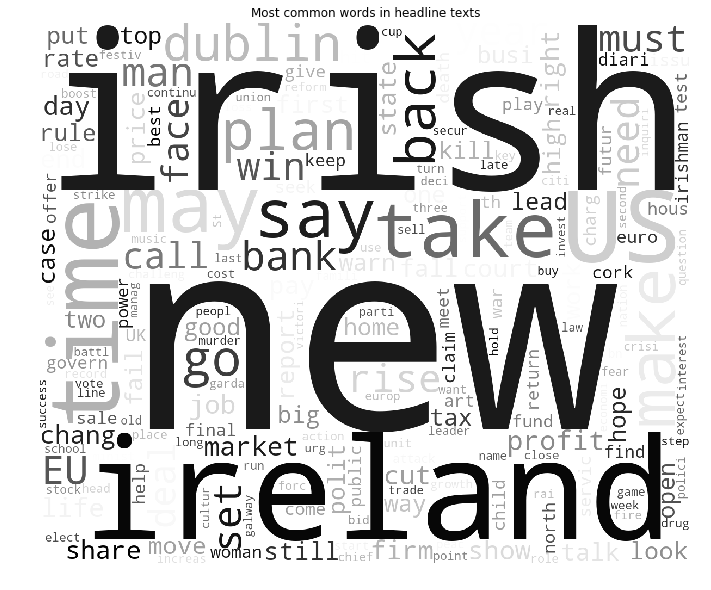

In [29]:
text = ' '.join(balanced_df['normalized_headline'])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000, random_state=42, colormap='Greys_r'
                     ).generate(text)

plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most common words in headline texts')
plt.show()